## Precedir el costo Diamantes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df_diamonds = sns.load_dataset('diamonds')
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df_diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
#  independiente (X) y dependiente (y)
X = df_diamonds['carat'].values.reshape(-1, 1)
y = df_diamonds['price'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [9]:
# Crear y entrenar el modelo
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_train)


In [11]:
from sklearn.metrics import mean_squared_error, r2_score

print('Coefficients: \n', regressor.coef_)
print('Independent term: \n', regressor.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))


Coefficients: 
 [[7741.37904828]]
Independent term: 
 [-2247.70447085]
Mean squared error: 2408781.08


In [12]:
print(regressor.score(X_test, y_test))
print('Variance score: %.2f' % r2_score(y_train, y_pred))


0.8509771156910657
Variance score: 0.85


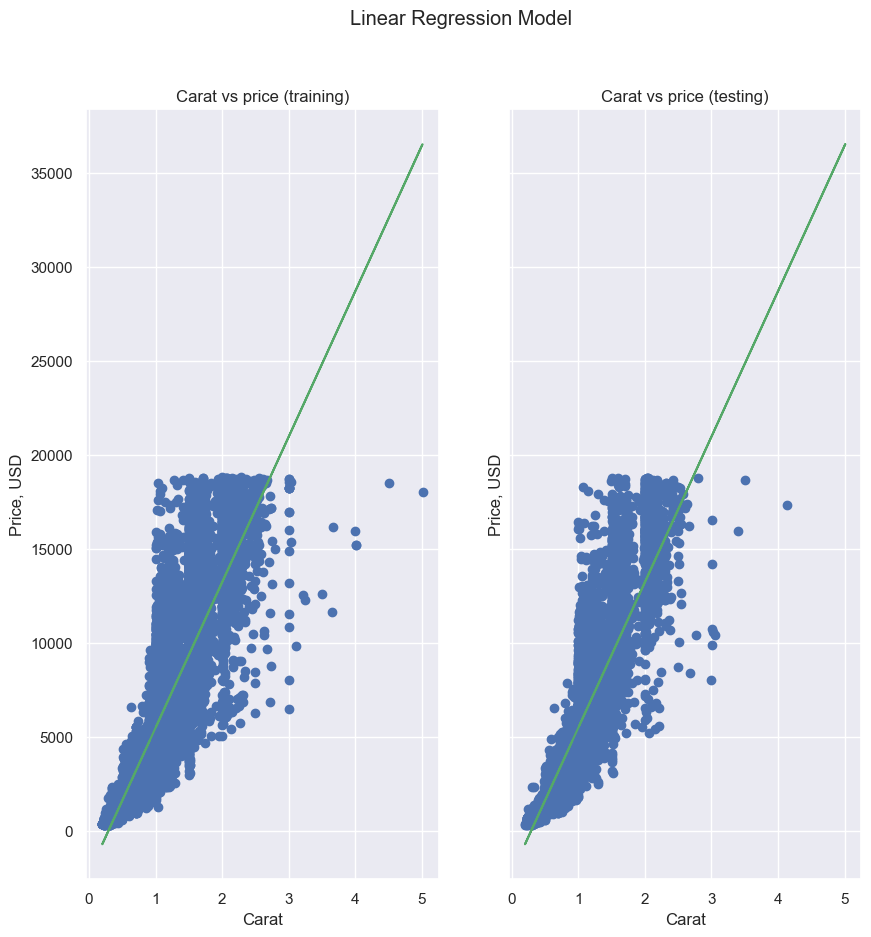

In [13]:
sns.set_theme()
fig, ax = plt.subplots(1, 2, figsize=(10, 10), sharey=True)

ax[0].scatter(X_train, y_train)
ax[0].plot(X_train, regressor.predict(X_train), c='g')
ax[0].set_title('Carat vs price (training)')
ax[0].set_xlabel('Carat')
ax[0].set_ylabel('Price, USD')

ax[1].scatter(X_test, y_test)
ax[1].plot(X_train, regressor.predict(X_train), c='g')
ax[1].set_title('Carat vs price (testing)')
ax[1].set_xlabel('Carat')
ax[1].set_ylabel('Price, USD')

plt.suptitle('Linear Regression Model')
plt.show()


# #Conclusión


Se está probando, mediante un modelo de regresión lineal, la relación entre el peso de un diamante y su precio. Primero se revisó que el conjunto de datos no tuviera valores nulos, lo que significa que no fue necesario realizar una limpieza extra.
Despues, los datos se dividieron en un conjunto de entrenamiento y otro de prueba para poder entrenar el modelo y evaluar su desempeño.
Al final, se demostró que la relación entre el precio y el peso del diamante es directa, ya que conforme aumentan los quilates también incrementa el costo. El coeficiente de determinación indica que tanto el modelo logra explicar el comportamiento del precio a partir del peso del diamante. 
